In [ ]:
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Specify the folder path in your Drive
load_path = '/content/drive/My Drive/'
BIM_epsilon_r = np.load(load_path + 'BIM_epsilon_r.npy')
BIM_sigma = np.load(load_path + 'BIM_sigma.npy')

tumor_images_epsilon_r = np.load(load_path + 'tumor_images_epsilon_r.npy')
tumor_images_sigma = np.load(load_path + 'tumor_images_sigma.npy')


reconstruction 1

Epoch 1/40
2/2 [==============================] - 12s 5s/step - loss: 0.6465 - accuracy: 0.5187 - val_loss: 2.2541 - val_accuracy: 0.3793
Epoch 2/40
2/2 [==============================] - 8s 4s/step - loss: 0.4766 - accuracy: 0.5214 - val_loss: 3.5323 - val_accuracy: 0.0976
Epoch 3/40
2/2 [==============================] - 8s 4s/step - loss: 0.3684 - accuracy: 0.5214 - val_loss: 2.0868 - val_accuracy: 0.0825
Epoch 4/40
2/2 [==============================] - 8s 4s/step - loss: 0.3030 - accuracy: 0.5213 - val_loss: 1.4286 - val_accuracy: 0.3601
Epoch 5/40
2/2 [==============================] - 8s 4s/step - loss: 0.2689 - accuracy: 0.5214 - val_loss: 1.4827 - val_accuracy: 0.1975
Epoch 6/40
2/2 [==============================] - 8s 4s/step - loss: 0.2531 - accuracy: 0.5214 - val_loss: 1.5012 - val_accuracy: 0.3703
Epoch 7/40
2/2 [==============================] - 8s 4s/step - loss: 0.2455 - accuracy: 0.5214 - val_loss: 1.7795 - val_accuracy: 0.3207
Epoch 8/40
2/2 [========================

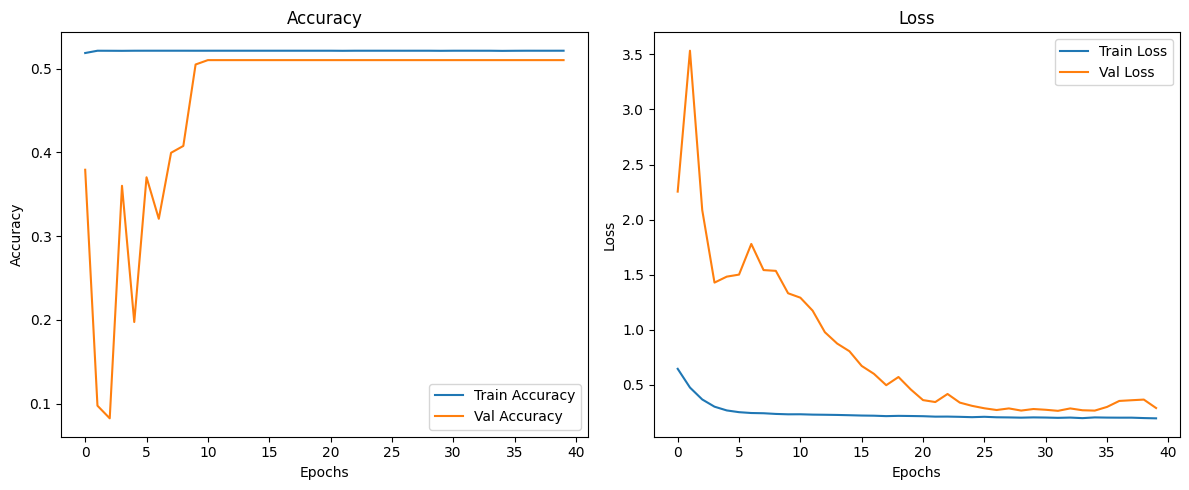

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, Model
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

def conv_block(x, filters):
    x = layers.Conv2D(filters, (3, 3), padding='same', kernel_initializer='he_normal')(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    x = layers.Conv2D(filters, (3, 3), padding='same', kernel_initializer='he_normal')(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    return x

def build_unet(input_shape=(128, 128, 1)):
    # Input layer
    BIM_sigma = layers.Input(input_shape, name="BIM_sigma")

    # Encoding Path
    enc1 = conv_block(BIM_sigma, 128)
    pool1 = layers.MaxPooling2D(pool_size=(2, 2), strides=2)(enc1)

    enc2 = conv_block(pool1, 256)
    pool2 = layers.MaxPooling2D(pool_size=(2, 2), strides=2)(enc2)

    enc3 = conv_block(pool2, 512)

    # Decoding Path
    up2 = layers.Conv2DTranspose(256, (2, 2), strides=2, padding='same')(enc3)
    up2 = layers.concatenate([up2, enc2])  # Skip connection
    dec2 = conv_block(up2, 256)

    up1 = layers.Conv2DTranspose(128, (2, 2), strides=2, padding='same')(dec2)
    up1 = layers.concatenate([up1, enc1])  # Skip connection
    dec1 = conv_block(up1, 128)

    # Output layer
    tumor_images_sigma = layers.Conv2D(1, (1, 1), activation='sigmoid', name="tumor_images_sigma")(dec1)

    # Define model
    model = Model(BIM_sigma, tumor_images_sigma)
    return model

# Create the model
unet_model = build_unet()

# Compile the model
unet_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Generate data
X, Y = BIM_sigma, tumor_images_sigma

# Split data into training and validation sets
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train the model
history = unet_model.fit(
    X_train, Y_train,
    validation_data=(X_val, Y_val),
    epochs=40,
    batch_size=16
)

# Plot accuracy and loss graphs
# Accuracy Plot
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


reconstruction-2

Epoch 1/40
2/2 [==============================] - 12s 3s/step - loss: 0.7130 - accuracy: 0.3745 - val_loss: 2.9986 - val_accuracy: 0.0011
Epoch 2/40
2/2 [==============================] - 6s 3s/step - loss: 0.5666 - accuracy: 0.5207 - val_loss: 11.4727 - val_accuracy: 1.1444e-04
Epoch 3/40
2/2 [==============================] - 6s 3s/step - loss: 0.4735 - accuracy: 0.5180 - val_loss: 13.0006 - val_accuracy: 4.4250e-04
Epoch 4/40
2/2 [==============================] - 6s 3s/step - loss: 0.3976 - accuracy: 0.5214 - val_loss: 13.5251 - val_accuracy: 0.0010
Epoch 5/40
2/2 [==============================] - 6s 3s/step - loss: 0.3512 - accuracy: 0.5214 - val_loss: 13.4996 - val_accuracy: 0.0051
Epoch 6/40
2/2 [==============================] - 6s 3s/step - loss: 0.3210 - accuracy: 0.5214 - val_loss: 13.2833 - val_accuracy: 0.0112
Epoch 7/40
2/2 [==============================] - 6s 3s/step - loss: 0.3029 - accuracy: 0.5214 - val_loss: 13.3571 - val_accuracy: 0.0093
Epoch 8/40
2/2 [==========

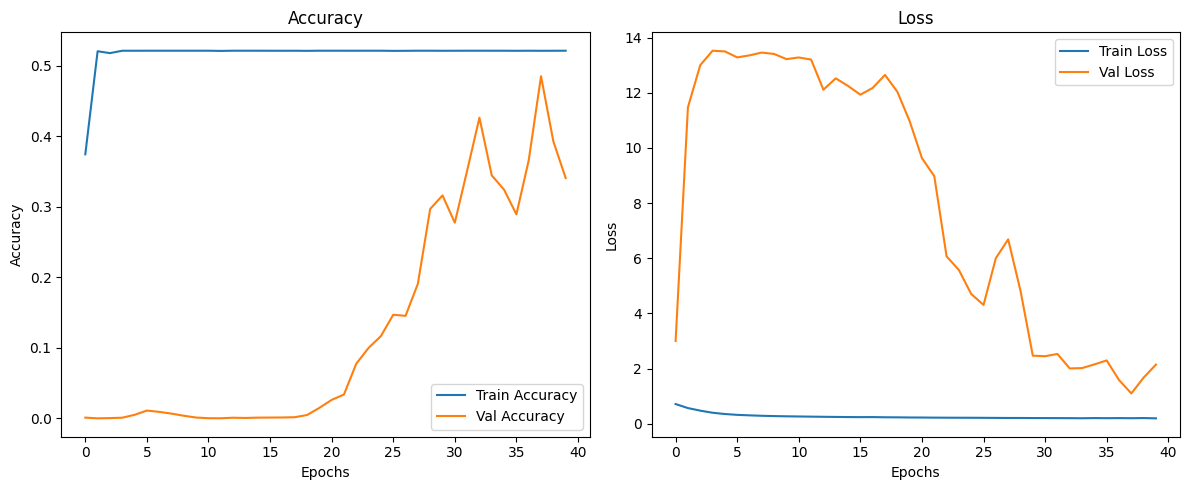

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, Model
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

def conv_block(x, filters):
    x = layers.Conv2D(filters, (3, 3), padding='same', kernel_initializer='he_normal')(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    x = layers.Conv2D(filters, (3, 3), padding='same', kernel_initializer='he_normal')(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    return x

def build_modified_unet(input_shape=(128, 128, 1)):
    inputs = layers.Input(input_shape)

    # Encoding Path
    enc1 = conv_block(inputs, 64)
    pool1 = layers.MaxPooling2D(pool_size=(2, 2), strides=2)(enc1)

    enc2 = conv_block(pool1, 128)
    pool2 = layers.MaxPooling2D(pool_size=(2, 2), strides=2)(enc2)

    enc3 = conv_block(pool2, 256)
    pool3 = layers.MaxPooling2D(pool_size=(2, 2), strides=2)(enc3)

    enc4 = conv_block(pool3, 512)
    pool4 = layers.MaxPooling2D(pool_size=(2, 2), strides=2)(enc4)

    # Bottleneck
    bottleneck = conv_block(pool4, 1024)

    # Decoding Path
    up4 = layers.Conv2DTranspose(512, (2, 2), strides=2, padding='same')(bottleneck)
    up4 = layers.concatenate([up4, enc4])
    dec4 = conv_block(up4, 512)

    up3 = layers.Conv2DTranspose(256, (2, 2), strides=2, padding='same')(dec4)
    up3 = layers.concatenate([up3, enc3])
    dec3 = conv_block(up3, 256)

    up2 = layers.Conv2DTranspose(128, (2, 2), strides=2, padding='same')(dec3)
    up2 = layers.concatenate([up2, enc2])
    dec2 = conv_block(up2, 128)

    up1 = layers.Conv2DTranspose(64, (2, 2), strides=2, padding='same')(dec2)
    up1 = layers.concatenate([up1, enc1])
    dec1 = conv_block(up1, 64)

    # Output layer
    outputs = layers.Conv2D(1, (1, 1), activation='sigmoid')(dec1)

    # Define model
    model = Model(inputs, outputs)
    return model

# Create the model
modified_unet_model = build_modified_unet()

# Generate data
X, Y = BIM_sigma, tumor_images_sigma

X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

# Compile the model
modified_unet_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = modified_unet_model.fit(
    X_train, Y_train,
    validation_data=(X_val, Y_val),
    epochs=40,
    batch_size=16
)



# Plot accuracy and loss graphs
# Accuracy Plot
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


reconstruction 3

Epoch 1/40
2/2 [==============================] - 10s 3s/step - loss: 0.8197 - accuracy: 0.2847 - val_loss: 0.9158 - val_accuracy: 0.2163
Epoch 2/40
2/2 [==============================] - 5s 2s/step - loss: 0.6258 - accuracy: 0.5209 - val_loss: 4.4710 - val_accuracy: 0.1136
Epoch 3/40
2/2 [==============================] - 5s 2s/step - loss: 0.5042 - accuracy: 0.5212 - val_loss: 7.7313 - val_accuracy: 0.0508
Epoch 4/40
2/2 [==============================] - 5s 3s/step - loss: 0.4364 - accuracy: 0.5213 - val_loss: 8.9456 - val_accuracy: 0.0326
Epoch 5/40
2/2 [==============================] - 5s 2s/step - loss: 0.3891 - accuracy: 0.5214 - val_loss: 9.2775 - val_accuracy: 0.0326
Epoch 6/40
2/2 [==============================] - 5s 2s/step - loss: 0.3573 - accuracy: 0.5213 - val_loss: 9.6538 - val_accuracy: 0.0174
Epoch 7/40
2/2 [==============================] - 5s 3s/step - loss: 0.3325 - accuracy: 0.5213 - val_loss: 9.9394 - val_accuracy: 0.0109
Epoch 8/40
2/2 [========================

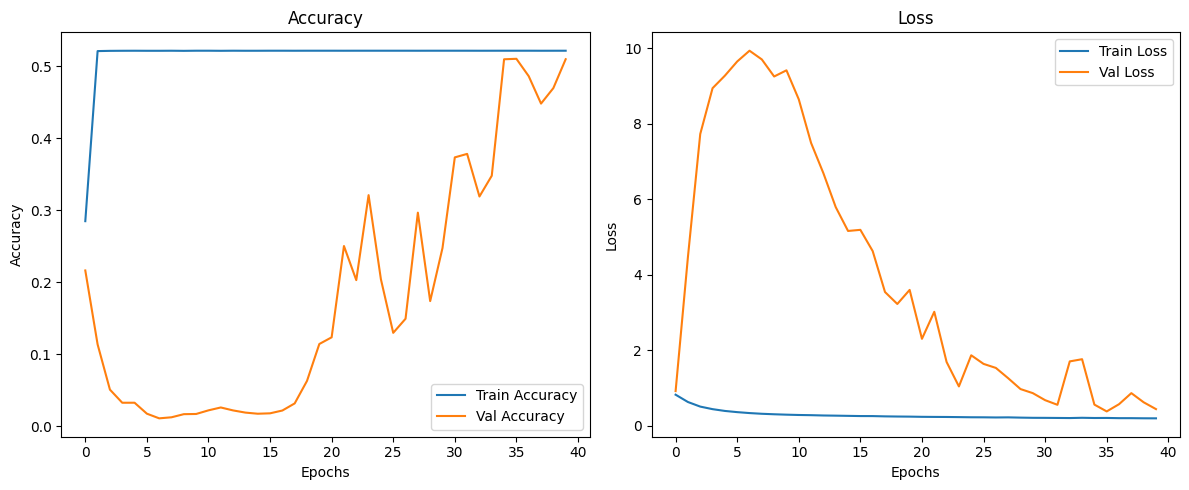

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, Model
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Define the convolutional block
def conv_block(x, filters):
    x = layers.Conv2D(filters, (3, 3), padding='same', kernel_initializer='he_normal')(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    x = layers.Conv2D(filters, (3, 3), padding='same', kernel_initializer='he_normal')(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    return x

# Define the third U-Net architecture
def build_third_unet(input_shape=(128, 128, 1)):
    inputs = layers.Input(input_shape)

    # Encoding Path
    enc1 = conv_block(inputs, 64)
    pool1 = layers.MaxPooling2D(pool_size=(2, 2), strides=2)(enc1)

    enc2 = conv_block(pool1, 128)
    pool2 = layers.MaxPooling2D(pool_size=(2, 2), strides=2)(enc2)

    enc3 = conv_block(pool2, 256)
    pool3 = layers.MaxPooling2D(pool_size=(2, 2), strides=2)(enc3)

    # Bottleneck
    bottleneck = conv_block(pool3, 512)

    # Decoding Path
    up2 = layers.Conv2DTranspose(256, (2, 2), strides=2, padding='same')(bottleneck)
    up2 = layers.concatenate([up2, enc3])
    dec2 = conv_block(up2, 256)

    up1 = layers.Conv2DTranspose(128, (2, 2), strides=2, padding='same')(dec2)
    up1 = layers.concatenate([up1, enc2])
    dec1 = conv_block(up1, 128)

    up0 = layers.Conv2DTranspose(64, (2, 2), strides=2, padding='same')(dec1)
    up0 = layers.concatenate([up0, enc1])
    dec0 = conv_block(up0, 64)

    # Output layer
    outputs = layers.Conv2D(1, (1, 1), activation='sigmoid')(dec0)

    # Define model
    model = Model(inputs, outputs)
    return model

# Create the model
third_unet_model = build_third_unet()

# Generate data
X, Y = BIM_sigma, tumor_images_sigma

X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

# Compile the model
third_unet_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = third_unet_model.fit(
    X_train, Y_train,
    validation_data=(X_val, Y_val),
    epochs=40,
    batch_size=16
)




# Plot accuracy and loss graphs
# Accuracy Plot
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:

Reconstructed_sigma1 = unet_model.predict(BIM_sigma)
Reconstructed_sigma2 = modified_unet_model.predict(BIM_sigma)
Reconstructed_sigma3 = third_unet_model.predict(BIM_sigma)


2/2 ━━━━━━━━━━━━━━━━━━━━ 20s 653ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step


1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 861ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 884ms/step


In [ ]:

Reconstructed_sigma1_reshaped = Reconstructed_sigma1.reshape(40, 128, 128)
Reconstructed_sigma2_reshaped = Reconstructed_sigma2.reshape(40, 128, 128)
Reconstructed_sigma3_reshaped = Reconstructed_sigma3.reshape(40, 128, 128)
Reconstructed_sigma1.shape

NameError: name 'Reconstructed_sigma1' is not defined

In [ ]:

np.save('Reconstructed_sigma1.npy', Reconstructed_sigma1_reshaped)
np.save('Reconstructed_sigma2.npy', Reconstructed_sigma2_reshaped)
np.save('Reconstructed_sigma3.npy', Reconstructed_sigma3_reshaped)